## Momentum trading algorithm targeting Bitcoin

In [49]:
import requests
import pandas as pd 
import matplotlib.pyplot as plt 

### Collecting data 
Using `coingecko` 

In [87]:
url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?vs_currency=usd&days=200&interval=daily"
params = {"vs_currency": "usd", "days": "200"}

response = requests.get(url, params=params)
data_list = response.json()



In [89]:
prices = pd.DataFrame(data_list["prices"], columns=["timestamp", "price"])
volumes = pd.DataFrame(data_list["total_volumes"], columns=["timestamp", "volume"])
prices["timestamp"] = pd.to_datetime(prices["timestamp"], unit='ms')
volumes["timestamp"] = pd.to_datetime(volumes["timestamp"], unit='ms')
prices.set_index("timestamp", inplace=True)
volumes.set_index("timestamp", inplace=True)

df = prices.join(volumes)

data = df.resample('1D').agg({
    'price': ['first', 'max', 'min', 'last'],
    'volume': 'sum'
})
data.columns = ['open', 'high', 'low', 'close', 'volume']
data.head()


,open,high,low,close,volume
timestamp,,,,,
2024-12-17,106074.107235,106074.107235,106074.107235,106074.107235,1.151847e+11
2024-12-18,106034.913403,106034.913403,106034.913403,106034.913403,9.341783e+10
2024-12-19,100355.576148,100355.576148,100355.576148,100355.576148,1.136920e+11
2024-12-20,97851.353771,97851.353771,97851.353771,97851.353771,1.006116e+11
2024-12-21,97691.434317,97691.434317,97691.434317,97691.434317,1.123409e+11


### Bollinger Bands

https://www.investopedia.com/terms/b/bollingerbands.asp

Middle band = SMA(close,n)

Upper band = Middle band + k.stddev

Lower band = Lower band - k.stddev

n = 20, k = 2


In [96]:
data['middle_bb'] = data['close'].rolling(window=20).mean()
data['std_20'] = data['close'].rolling(window=20).std()
data['upper_bb'] = data['middle_bb'] + 2 * data['std_20']
data['lower_bb'] = data['middle_bb'] - 2 * data['std_20']

### Visualise 

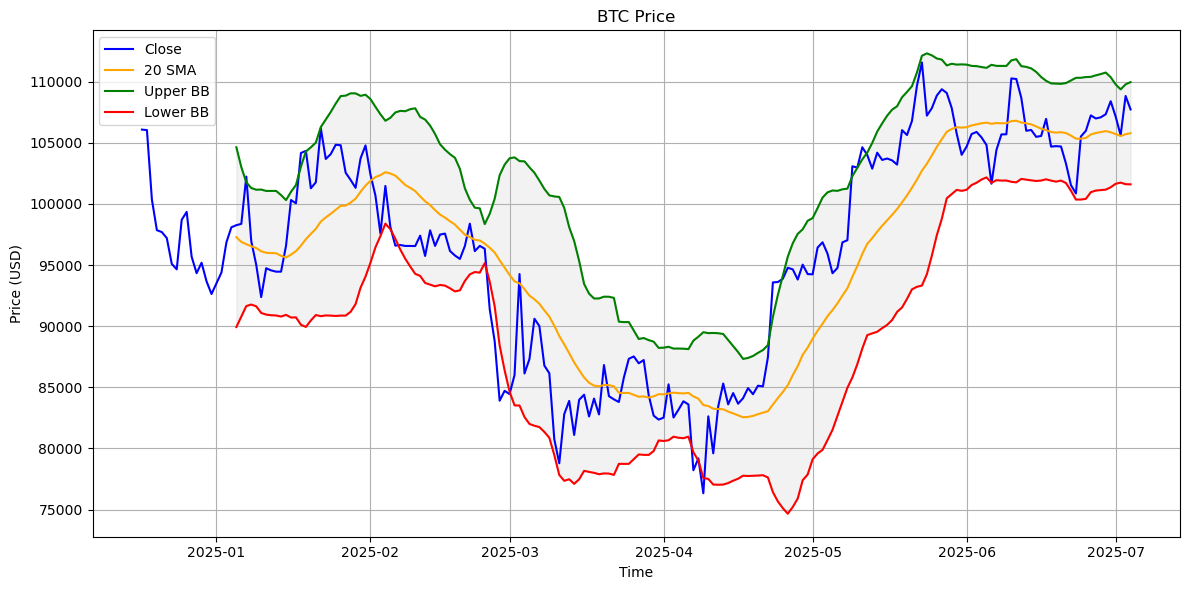

In [102]:
plt.figure(figsize=(12,6))
plt.plot(data.index, data['close'], label='Close', color='blue')
plt.plot(data.index, data['middle_bb'], label='20 SMA', color='orange')
plt.plot(data.index, data['upper_bb'], label='Upper BB', color='green')
plt.plot(data.index, data['lower_bb'], label='Lower BB', color='red')
plt.fill_between(data.index, data['lower_bb'], data['upper_bb'], color='grey', alpha=0.1)
plt.title('BTC Price')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()